In [124]:
from __future__ import annotations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import typing as tp
import openpyxl


In [125]:
class ResultVisualizerAndSaver:
    
    def __init__(self):
        self.Name = 'ResultVisualizerAndSaver'
    
    @staticmethod
    def vis_results_RQ_1(df:pd.DataFrame, model_type:str,metrics_type:str, in_sample_validation: bool = False)-> None:
        
        df = df[df['Model'] == model_type]
        df = df[df['metrics_type'] == metrics_type]

        df = df[df['in_sample_validation'] == in_sample_validation]
        df = df.drop(['split_type','in_sample_validation'], axis=1)
        if in_sample_validation:
            df = df.drop(['Validation'], axis=1)
        df = df.round(2)
        ax =df.plot(kind='bar', figsize=(12,6))
        plt.xticks(rotation=0)
        if metrics_type == 'continuous':
            if model_type == 'RF':
                plt.ylabel('Model Loss(NLL)')
            else:
                plt.ylabel('Model Loss(LL)')
        else:
            plt.ylabel('Model Accuracy(%)')
        
        if metrics_type == 'discrete':
            plt.title(f'{model_type} Performance Accuracy(Discrete Metrics)')
        else:
            plt.title(f'{model_type} Model Loss(Continuous Metrics)')
        
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() *1.005, p.get_height() * 1.01))
        plt.yticks(ticks=[])
        
        plt.box(False)
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
        plt.savefig(os.path.join('plots',f'{model_type}_OOS= {in_sample_validation}_{metrics_type}.png'), bbox_inches='tight')
        
        plt.close()
        
        
    @staticmethod   
    def vis_results_RQ_3(df:pd.DataFrame, model_type:str,metrics_type:str)-> None:
        
        df_oos = df[df['in_sample_validation'] == False]
        df_oos = df_oos[df_oos['metrics_type'] == metrics_type]
        df_oos = df_oos[df_oos['Model'] == model_type]
        df_oos = df_oos.drop(['Train'], axis=1)
        
        df_is = df[df['in_sample_validation'] == True]
        df_is = df_is[df_is['metrics_type'] == metrics_type]
        df_is = df_is[df_is['Model'] == model_type]
        df_is = df_is.drop(['Validation'], axis=1)

        cols = list(df_is.columns)
        new_cols = []
        for col in cols:
            if col == 'Train':
                new_cols.append('Validation')
            else:
                new_cols.append(col)
                
        df_is.columns = new_cols
        
        df = pd.concat([df_oos,df_is], axis=0)
        df= df.drop(['split_type','Model','metrics_type'], axis=1)
        
        order = []
        if metrics_type == 'discrete':
            if model_type == 'RF':
                for i in range(1,7,2):
                    order.append(f'M{i}RF')
                    order.append(f'M{i+6}RF')
            else:
                for i in range(1,7,2):
                    order.append(f'M{i}ANN')
                    order.append(f'M{i+6}ANN')
        else:
            if model_type == 'RF':
                for i in range(2,8,2):
                    order.append(f'M{i}RF')
                    order.append(f'M{i+6}RF')
            else:
                for i in range(2,8,2):
                    order.append(f'M{i}ANN')
                    order.append(f'M{i+6}ANN')
        
        df = df.loc[order]
        
        df_val = df[['Validation','in_sample_validation']]
        df_val['Validation'] = round(df_val['Validation'],2)
        df_test = df[['Test','in_sample_validation']]
        df_test['Test'] = round(df_test['Test'],2)
        
        fig, ax = plt.subplots(1,2, figsize=(12,6))
        
        sns.barplot(x=df_val.index, y='Validation', data=df_val, ax=ax[0],hue='in_sample_validation')
        ax[0].set_title('Validation')
        ax[0].legend().remove()
        
        if metrics_type == 'continuous':
            if model_type == 'RF':
                ax[0].set_ylabel('Model Loss(NLL)')
            else:
                ax[0].set_ylabel('Model Loss(LL)')
        else:
            ax[0].set_ylabel('Model Accuracy(%)')
        
        sns.barplot(x=df_test.index, y='Test', data=df_test, ax=ax[1],hue='in_sample_validation')
        ax[1].set_title('Test')
        ax[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
        ax[1].set_ylabel('')
        
        
        for i in range(2):
            ax[i].set_xlabel('')
            ax[i].spines['top'].set_visible(False)
            ax[i].spines['right'].set_visible(False)
            ax[i].spines['left'].set_visible(False)
            ax[i].spines['bottom'].set_visible(False)
            ax[i].set_yticks([])
            ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=0, fontsize=10)
            
            
            for p in ax[i].patches:
                if p.get_height() != 0:
                    ax[i].annotate(str(p.get_height()), (p.get_x() *1.005, p.get_height() * 1.02))
            
        plt.savefig(os.path.join('plots',f'{model_type}_{metrics_type}.png'), bbox_inches='tight')
        plt.close()
        
        
    @staticmethod
    def vis_results_RQ_2(df:pd.DataFrame, model_type:str,mode:str,model_comparison: str)-> None:
        
        df = df[df['Model'] == model_type]
        df = df[df['Model Comparison'] == model_comparison]
        df = df.loc[mode]
        df['Pro. Mode\nShare Test'] = round(df['Pro. Mode\nShare Test'],2)
        df['Pro. Mode\nShare Val'] = round(df['Pro. Mode\nShare Val'],2)
        
        df_test = df[['Actual Mode\nShare Test','Pro. Mode\nShare Test','Discrete Mode\nShare Test','Model Comparison']]
        df_test = pd.DataFrame(df_test)
        col = df_test.loc['Model Comparison']
        df_test.drop('Model Comparison', axis=0, inplace=True)
        df_test.columns = col
        #df_test[col] = round(df_test[col],2)
        
        df_val = df[['Actual Mode\nShare Val','Pro. Mode\nShare Val','Discrete Mode\nShare Val','Model Comparison']]
        df_val = pd.DataFrame(df_val)
        col = df_val.loc['Model Comparison']
        df_val.drop('Model Comparison', axis=0, inplace=True)
        df_val.columns = col
        #df_val[col] = round(df_val[col],2)
        
        fig, ax = plt.subplots(1,2, figsize=(12,6))
        
        df_test.plot(kind='bar', ax=ax[0])
        ax[0].set_title('Test')
        ax[0].set_ylabel('Mode Share')
        ax[0].legend().remove()
        
        df_val.plot(kind='bar', ax=ax[1])
        ax[1].set_title('Validation')
        ax[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
        
        for i in range(2):
            ax[i].set_xlabel('')
            ax[i].set_ylabel('')
            ax[i].spines['top'].set_visible(False)
            ax[i].spines['right'].set_visible(False)
            ax[i].spines['left'].set_visible(False)
            ax[i].spines['bottom'].set_visible(False)
            ax[i].set_yticks([])
            ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=0)
            
            
            for p in ax[i].patches:
                if p.get_height() != 0:
                    ax[i].annotate(str(p.get_height()), (p.get_x() *1.005, p.get_height() * 1.01)) 
        mode = mode.replace('\n','_')           
        plt.savefig(os.path.join('plots',f'{model_type}_{mode}_{model_comparison}.png'), bbox_inches='tight')
        
        plt.close()

    
        
    @staticmethod
    def vis_mode_share_RQ2(df:pd.DataFrame, model_type:str,model_comparison: str)-> None:
        
        
        modes = ['No Moco\nPt','No Moco\nAuto','No Moco\nBike','No Moco\nWalk','Moco Pt','Moco Auto','Moco Bike','Moco Walk']*12
        df.index = modes
        
        df = df[df['Model'] == model_type]
        df = df[df['Model Comparison'] == model_comparison]
        df['Pro. Mode\nShare Test'] = round(df['Pro. Mode\nShare Test'],2)
        df['Pro. Mode\nShare Val'] = round(df['Pro. Mode\nShare Val'],2)
        
        df_test = df[['Actual Mode\nShare Test','Pro. Mode\nShare Test','Discrete Mode\nShare Test','Model Comparison']]
        
        df_val = df[['Actual Mode\nShare Val','Pro. Mode\nShare Val','Discrete Mode\nShare Val','Model Comparison']]
        
        
        df_test = df_test.drop('Model Comparison', axis=1)
        df_val = df_val.drop('Model Comparison', axis=1)
        
        fig, ax = plt.subplots(2,1, figsize=(12,12))
           
        df_test.plot(kind='bar', ax=ax[0])
        ax[0].set_title(f'{model_type} Mode Share Comparison for {model_comparison}')

        ax[0].legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
        
        df_val.plot(kind='bar', ax=ax[1])
        ax[1].set_title('Validation')
        
        ax[1].set_title('Validation')
        ax[1].legend().remove()
        
        for i in range(2):
            ax[i].set_xlabel('')
            ax[i].set_ylabel('')
            ax[i].spines['top'].set_visible(False)
            ax[i].spines['right'].set_visible(False)
            ax[i].spines['left'].set_visible(False)
            ax[i].spines['bottom'].set_visible(False)
            ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=0)
        
        plt.savefig(os.path.join('plots',f'mode share comparison {model_type}_{model_comparison}.png'), bbox_inches='tight')
        
        plt.close()
           
    @staticmethod
    def save_best_params(models:tp.List[tp.Dict],cv:int,n_iter:int)-> pd.DataFrame:
        df_list_rf = []
        df_list_ann = []
        for model in models:
            if 'RF' in list(model.keys())[0]:
                keys = list(model.keys())
                for key in keys:
                    df = pd.DataFrame(model[key]['best_params'], index=[key])
                    df_list_rf.append(df)
            else:
                keys = list(model.keys())
                for key in keys:
                    df = pd.DataFrame(model[key]['best_params'], index=[key])
                    df_list_ann.append(df)
        df_rf = pd.concat(df_list_rf, axis=0)
        df_ann = pd.concat(df_list_ann, axis=0)
        
        df_rf.to_csv(os.path.join('reports',f'best_params_rf_{cv}_{n_iter}.csv'))
        df_ann.to_csv(os.path.join('reports',f'best_params_ann_{cv}_{n_iter}.csv'))    
    
    @staticmethod
    def save_conf_matrix(models:tp.List[tp.Dict],cv:int,n_iter:int)-> None:
        
        modes = ['No Moco\nPt','No Moco\nAuto','No Moco\nBike','No Moco\nWalk','Moco Pt','Moco Auto','Moco Bike','Moco Walk']
        index_ = [f'{mode}_pred' for mode in modes]
        columns = [f'{mode}_actual' for mode in modes]
        
        
        for model in models:
            wb = openpyxl.Workbook()
            for key in list(model.keys()):
                if 'conf_matrix_test' in list(model[key].keys()):
                    df_conf_test = pd.DataFrame(model[key]['conf_matrix_test'], index=index_, columns=columns)
                    
                    df_conf_val = pd.DataFrame(model[key]['conf_matrix_val'], index=index_, columns=columns)

                    
                    ws = wb.create_sheet(f'{key}_test_val_conf_matrix')
                   
                    ws.append([f'Confusion Matrix Test {key}'])
                        
                    for i in range(len(df_conf_test)):
                        ws.append(list(df_conf_test.iloc[i]))
                    
                    for i in range(5):
                        ws.append([])
                        
                    ws.append([f'Confusion Matrix Validation {key}'])
                    
                    for i in range(len(df_conf_val)):
                        ws.append(list(df_conf_val.iloc[i]))
                        
                    ws.insert_cols(1,1)
                    ws.insert_rows(2,1)
                    ws.insert_rows(17,1)
                    
                    for i in range(len(index_)):
                        ws[f'A{i+3}'] = index_[i]
                        ws[f'A{i+18}'] = index_[i]
                    for i in range(len(columns)):
                        ws[f'{chr(66+i)}2'] = columns[i]
                        ws[f'{chr(66+i)}17'] = columns[i]
                    
            wb.remove(wb['Sheet'])       
            if 'RF' in list(model.keys())[0]:
                wb.save(os.path.join('reports',f'RF conf_matrix_{cv}_{n_iter}.xlsx'))
            else:
                wb.save(os.path.join('reports',f'ANN conf_matrix_{cv}_{n_iter}.xlsx'))
                                                        
    @staticmethod                   
    def save_model_performance(df:pd.DataFrame,cv:int,n_iter:int)-> None:
        df.to_csv(os.path.join('reports',f'model_performance_{cv}_{n_iter}.csv'))
        
    @staticmethod
    def save_model_mode_share_pred(df:pd.DataFrame,cv:int,n_iter:int)-> None:
        df.to_csv(os.path.join('reports',f'model_mode_share_pred_{cv}_{n_iter}.csv'))
        
    @staticmethod
    def save_classification_report(models:tp.List[tp.Dict],cv:int,n_iter:int)-> None:
        modes = ['No Moco\nPt','No Moco\nAuto','No Moco\nBike','No Moco\nWalk','Moco Pt','Moco Auto','Moco Bike','Moco Walk']
        metrics = ['precision','recall','f1-score','support']
        metrics_2 = ['accuracy','macro avg','weighted avg']
        modes.extend(metrics_2)
        for model in models:
            wb = openpyxl.Workbook()
            
            for key in list(model.keys()):
                if 'performance_test' in list(model[key].keys()):
                    df_test = pd.DataFrame(model[key]['performance_test'])
                    df_test = df_test.transpose()
                    df_val = pd.DataFrame(model[key]['performance_val'])
                    df_val = df_val.transpose()
                    
                    ws = wb.create_sheet(f'{key}_classification_report')
                    
                    ws.append([f'Classification Report Test {key}'])
                    for i in range(len(df_test)):
                        ws.append(list(df_test.iloc[i]))
                        
                    for i in range(5):
                        ws.append([])
                    
                    ws.append([f'Classification Report Validation {key}'])
                    for i in range(len(df_val)):
                        ws.append(list(df_val.iloc[i]))
                        
                    ws.insert_cols(1,1)
                    ws.insert_rows(2,1)
                    ws.insert_rows(20,1)
                    
                    for i in range(len(modes)):
                        ws[f'A{i+3}'] = modes[i]
                        ws[f'A{i+21}'] = modes[i]
                    
                    for i in range(len(metrics)):
                        ws[f'{chr(66+i)}2'] = metrics[i]
                        ws[f'{chr(66+i)}20'] = metrics[i]
                    
            wb.remove(wb['Sheet'])
            if 'RF' in list(model.keys())[0]:
                wb.save(os.path.join('reports',f'RF_classification_report_{cv}_{n_iter}.xlsx'))
            else:
                wb.save(os.path.join('reports',f'ANN_classification_report_{cv}_{n_iter}.xlsx'))
                    
                    
                    

Result Analysis and Visualization for different models settings of RF and ANN

In [3]:
#ra = ResultAnalysis(cv=5,n_iter=20,random_state=42,n_features=63,early_stop_patience=10)
#ra = ResultAnalysis(cv=2,n_iter=2,random_state=42,n_features=63,early_stop_patience=10)


In [4]:
#ra.create_rf_models()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best score: 0.7043862331864948
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best score: -0.7399485610593696
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best score: 0.7287037037037037
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best score: -0.6949604933830071
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best score: 0.589917695473251
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best score: -0.9011137214944238
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best score: 0.7267181467181467
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best score: -0.7043706798332987
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best score: 0.7575617283950618
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best score: -0.6461929578808553
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best

In [5]:
#ra.create_ann_models()

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
102/102 [==============================] - 0s 2ms/step
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
102/102 [==============================] - 0s 2ms/step
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
101/101 [==============================] - 0s 2ms/step
Iteration: 1
Iteration

In [9]:
ra.discrete_continuous_metrics().tail(10)

,Train,Validation,Test,split_type,metrics_type,in_sample_validation,Model
M3ANN,69.700,69.200,50.310,random_val,discrete,False,ANN
M4ANN,0.745,0.754,1.246,random_val,continuous,False,ANN
M5ANN,59.770,54.200,55.420,grouped,discrete,False,ANN
M6ANN,0.923,0.943,0.938,grouped,continuous,False,ANN
M7ANN,69.780,93.020,68.440,random,discrete,True,ANN
M8ANN,0.738,0.485,0.758,random,continuous,True,ANN
M9ANN,72.420,93.730,51.080,random_val,discrete,True,ANN
M10ANN,0.706,0.445,1.271,random_val,continuous,True,ANN
M11ANN,58.990,70.000,56.750,grouped,discrete,True,ANN
M12ANN,0.930,0.775,0.939,grouped,continuous,True,ANN


In [10]:
ra.compare_discrete_continuous_metrics()

,Actual Mode\nShare Test,Pro. Mode\nShare Test,Discrete Mode\nShare Test,Actual Mode\nShare Val,Pro. Mode\nShare Val,Discrete Mode\nShare Val,Model Comparison,Model
No Moco\nPt,522,507.097000,485,547,532.920000,518,M1RF vs M2RF,RF
No Moco\nAuto,406,417.083000,459,401,413.397000,440,M1RF vs M2RF,RF
No Moco\nBike,570,567.739000,567,616,600.232000,606,M1RF vs M2RF,RF
No Moco\nWalk,78,84.453000,65,72,89.708000,72,M1RF vs M2RF,RF
Moco Pt,539,541.700000,539,548,520.741000,528,M1RF vs M2RF,RF
...,...,...,...,...,...,...,...,...
No Moco\nWalk,72,59.533913,33,86,69.878136,38,M11ANN vs M12ANN,ANN
Moco Pt,509,545.775024,537,526,533.999756,503,M11ANN vs M12ANN,ANN
Moco Auto,312,292.938934,312,250,272.674164,277,M11ANN vs M12ANN,ANN
Moco Bike,725,727.776489,747,760,752.374146,808,M11ANN vs M12ANN,ANN


In [118]:
rv = ResultVisualizerAndSaver()


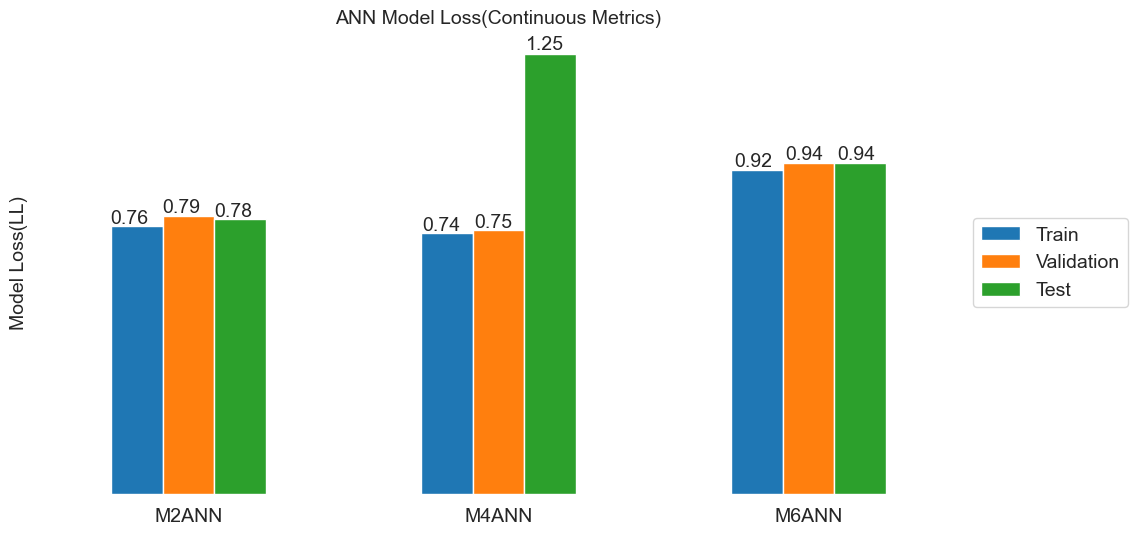

,Train,Validation,Test,metrics_type,Model
M2ANN,0.76,0.79,0.78,continuous,ANN
M4ANN,0.74,0.75,1.25,continuous,ANN
M6ANN,0.92,0.94,0.94,continuous,ANN


In [34]:
rv.vis_results_RQ_1(df=ra.discrete_continuous_metrics(),metrics_type='continuous',model_type='ANN', in_sample_validation=False)

In [114]:
rv.vis_results_RQ_3(df=ra.discrete_continuous_metrics(),metrics_type='discrete',model_type='ANN')

In [119]:
df = ra.compare_discrete_continuous_metrics()


In [120]:
modes = ['No Moco\nPt','No Moco\nAuto','No Moco\nBike','No Moco\nWalk','Moco Pt','Moco Auto','Moco Bike','Moco Walk']
model_comparison_rf = ['M1RF vs M2RF','M3RF vs M4RF','M5RF vs M6RF','M7RF vs M8RF','M9RF vs M10RF','M11RF vs M12RF']
model_comparison_ann = ['M1ANN vs M2ANN','M3ANN vs M4ANN','M5ANN vs M6ANN','M7ANN vs M8ANN','M9ANN vs M10ANN','M11ANN vs M12ANN']

In [121]:
for mode in modes:
    for model_comparison in model_comparison_rf:
        rv.vis_results_RQ_2(df=df,model_type='RF',mode=mode,model_comparison=model_comparison)
        
    for model_comparison in model_comparison_ann:
        rv.vis_results_RQ_2(df=df,model_type='ANN',mode=mode,model_comparison=model_comparison)


In [123]:
for model_comparison in model_comparison_rf:
    rv.vis_mode_share_RQ2(df=df,model_type='RF',model_comparison=model_comparison)
for model_comparison in model_comparison_ann:
    rv.vis_mode_share_RQ2(df=df,model_type='ANN',model_comparison=model_comparison)

In [12]:
rv.save_best_params(models=[ra.RF_Models,ra.ANN_Models],cv=5.0,n_iter=20.0) 

In [13]:
rv.save_conf_matrix(models=[ra.RF_Models,ra.ANN_Models],cv=5.0,n_iter=20.0)
    

In [14]:
rv.save_model_performance(df=ra.discrete_continuous_metrics(),cv=5.0,n_iter=20.0)

In [15]:
rv.save_model_mode_share_pred(df=ra.compare_discrete_continuous_metrics(),cv=5.0,n_iter=20.0)

In [16]:
rv.save_classification_report(models=[ra.RF_Models,ra.ANN_Models],cv=5.0,n_iter=20.0)

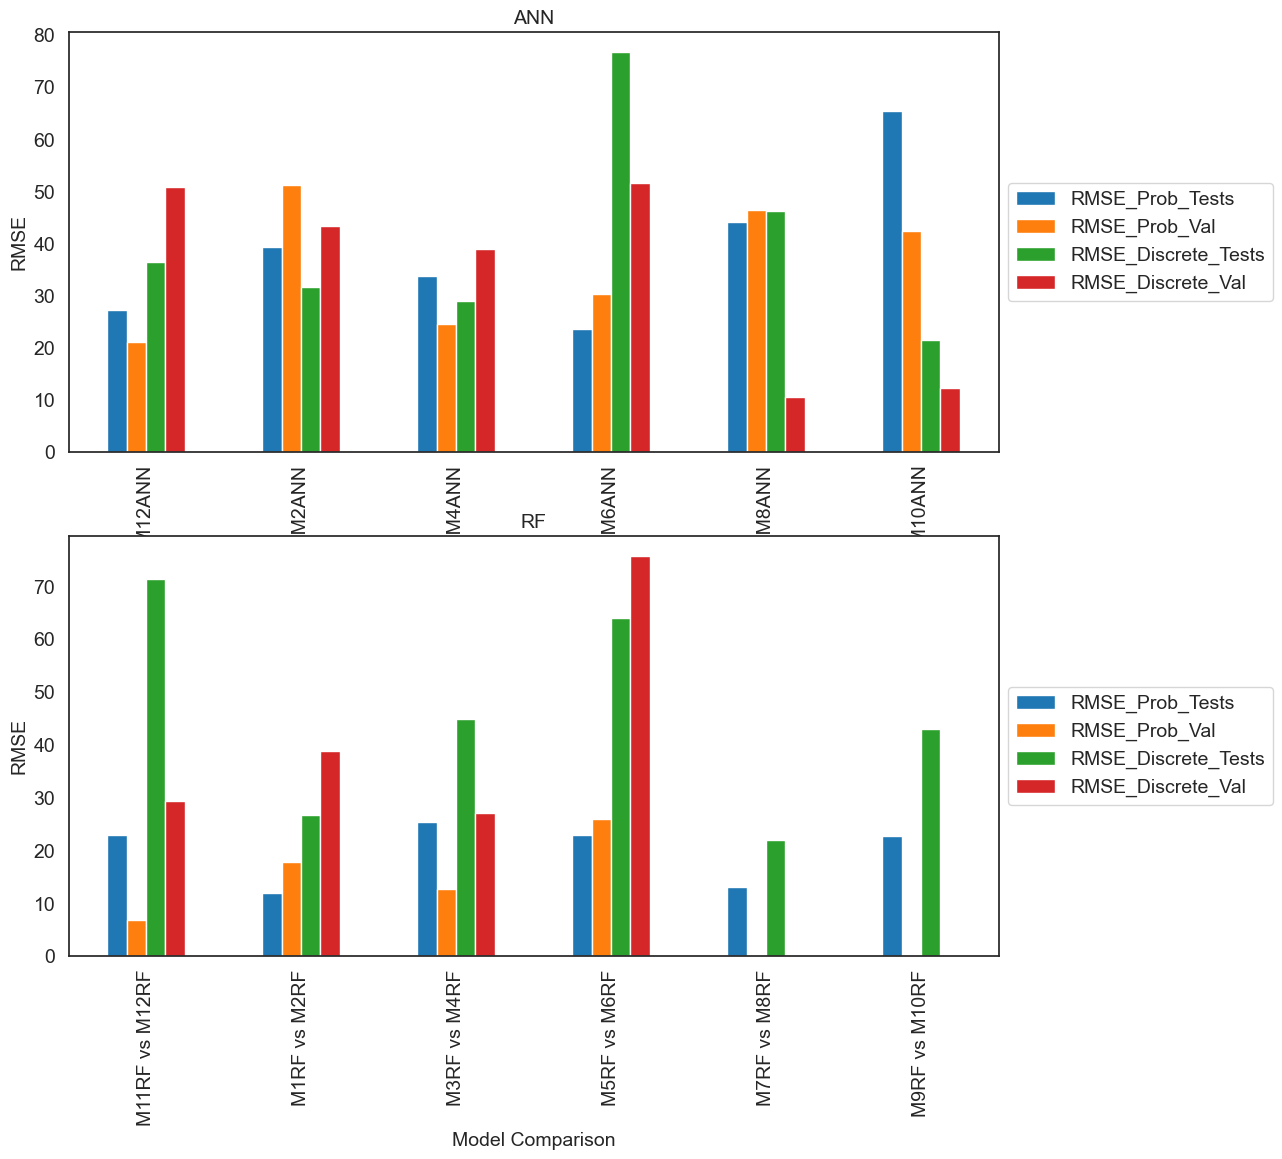

In [164]:
rmses = []
for i in ['ANN','RF']:
    df = ra.compare_discrete_continuous_metrics()
    df = df[df['Model'] == i]
    df.reset_index(inplace=True)
    df['SE_Prob_Tests'] = (df['Actual Mode\nShare Test'] - df['Pro. Mode\nShare Test'])**2
    df['SE_Prob_Val'] = (df['Actual Mode\nShare Val'] - df['Pro. Mode\nShare Val'])**2
    df['SE_Discrete_Tests'] = (df['Actual Mode\nShare Test'] - df['Discrete Mode\nShare Test'])**2
    df['SE_Discrete_Val'] = (df['Actual Mode\nShare Val'] - df['Discrete Mode\nShare Val'])**2
    df_mse= df.groupby('Model Comparison')[['SE_Prob_Tests','SE_Prob_Val','SE_Discrete_Tests','SE_Discrete_Val']].mean()
    df_mse
    #rmse
    df_rmse = df_mse**0.5
    cols = ['RMSE_Prob_Tests','RMSE_Prob_Val','RMSE_Discrete_Tests','RMSE_Discrete_Val']
    df_rmse.columns = cols
    rmses.append(df_rmse)
    
fig, ax = plt.subplots(2,1, figsize=(12,12))
rmses[0].plot(kind='bar', ax=ax[0])
ax[0].set_title('ANN')
ax[0].set_ylabel('RMSE')
ax[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax[0].xaxis.set_tick_params(rotation=0,fontsize=10)

rmses[1].plot(kind='bar', ax=ax[1])
ax[1].set_title('RF')
ax[1].set_ylabel('RMSE')
ax[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax[1].xaxis.set_tick_params(rotation=0,fontsize=10)